In [2]:
#!pip install scikit-fuzzy

In [20]:
import numpy as np
from skfuzzy import control as ctrl

In [25]:
nivel_tanque = ctrl.Antecedent(np.arange(0, 101, 1), "Nivel") 
erro_leitura = ctrl.Antecedent(np.arange(0, 101, 1), "Erro")
potencia = ctrl.Consequent(np.arange(0, 101, 1), "Potencia")

nivel_tanque.automf(3, names=["baixo", "medio" , "alto" ]) 
erro_leitura.automf(3, names=["baixo", "medio" , "alto" ])
potencia.automf(3, names=["baixo", "medio" , "alto" ]) 

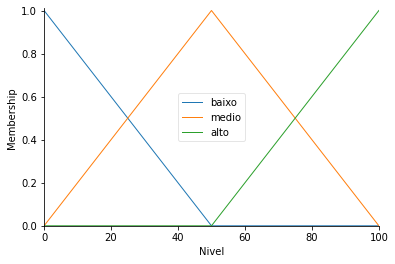

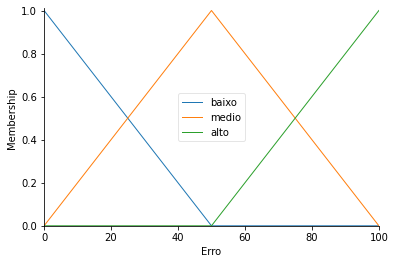

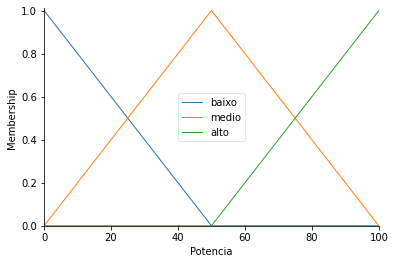

In [26]:
nivel_tanque.view()
erro_leitura.view()
potencia.view()

In [27]:
rule1 = ctrl.Rule(nivel_tanque["baixo"] & erro_leitura["baixo"], potencia["alto"])
rule2 = ctrl.Rule(nivel_tanque["alto"] | erro_leitura["baixo"], potencia["baixo"])
rule3 = ctrl.Rule(nivel_tanque["medio"]| erro_leitura["medio"], potencia["medio"])

potencia_ctrl = ctrl.ControlSystem([rule1, rule2, rule3  ]) 
potenciando = ctrl.ControlSystemSimulation(potencia_ctrl)

42.29 %


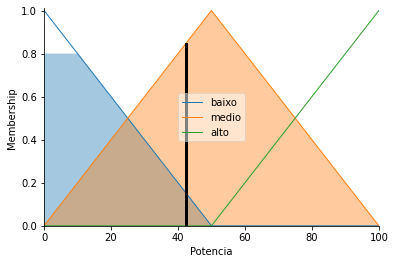

In [29]:
#1 A)
potenciando.input["Nivel"] = 50
potenciando.input["Erro"] = 10

potenciando.compute()

print('{:.2f} %'.format(potenciando.output["Potencia"]))
potencia.view(sim=potenciando)

41.22 %


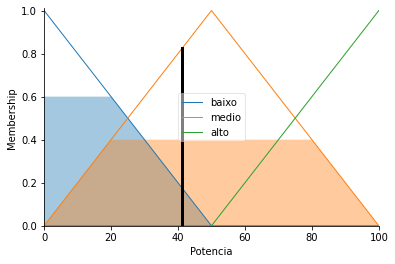

In [31]:
#2 B)
potenciando.input["Nivel"] = 80
potenciando.input["Erro"] = 20

potenciando.compute()

print('{:.2f} %'.format(potenciando.output["Potencia"]))
potencia.view(sim=potenciando)

50.000000000000014


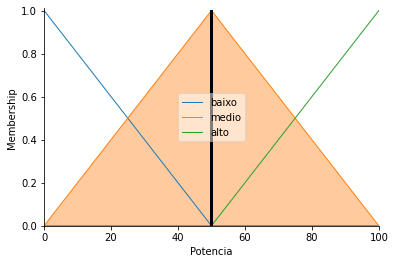

In [30]:
#1 C
potenciando.input["Nivel"] = 10
potenciando.input["Erro"] = 50

potenciando.compute()

print(potenciando.output["Potencia"])
potencia.view(sim=potenciando)